### **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

**Insight:**


*  `pandas`, `numpy`: Untuk mengolah dan menghitung data (seperti tabel).
* `matplotlib.pyplot`, `seaborn`: Untuk membuat grafik
dan visualisasi data.
* `joblib`: Untuk menyimpan dan memuat model atau objek Python lainnya.
* `sklearn.model_selection.train_test_split`: Untuk membagi data menjadi data latih dan data uji.
* `sklearn.model_selection.GridSearchCV`: (Meskipun diimpor, kode yang ditampilkan tidak menggunakannya) Biasanya untuk mencari pengaturan terbaik (parameter) untuk model.
* `sklearn.preprocessing.StandardScaler`: Untuk menstandarkan data numerik (membuat nilainya rata-rata 0).
* `sklearn.preprocessing.LabelEncoder`: Untuk mengubah data teks menjadi angka.
* `imblearn.over_sampling.SMOTE`: Untuk menyeimbangkan jumlah data antar kategori (misalnya, jumlah penderita dan non-penderita diabetes).
* `sklearn.ensemble.RandomForestClassifier`: Model machine learning yang akan digunakan untuk prediksi.
* `sklearn.metrics.classification_report`, `accuracy_score`, `confusion_matrix`: Alat untuk mengukur seberapa baik kinerja model.



### **Load Dataset**

In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


### **EDA**

In [3]:
# Meninjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


**Insight:**

Berdasarkan data di atas, terdapat 9 kolom dengan 100000 baris. Terdiri dari 4 fitur (hypertension, heart_disease, blood_glucose_level, diabetes) dengan tipe data integer, 3 fitur (age, bmi, HbA1c_level) dengan tipe data float , dan 2 fitur (gender dan smoking_history) dengan tipe data object. Dataset ini tidak memiliki missing value pada setiap kolomnya.

In [4]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


**Insight:**

Berdasarkan data statistik deskriptif tersebut, terdapat outlier pada kolom `age` = 0.08 dan `bmi` = 95.69.

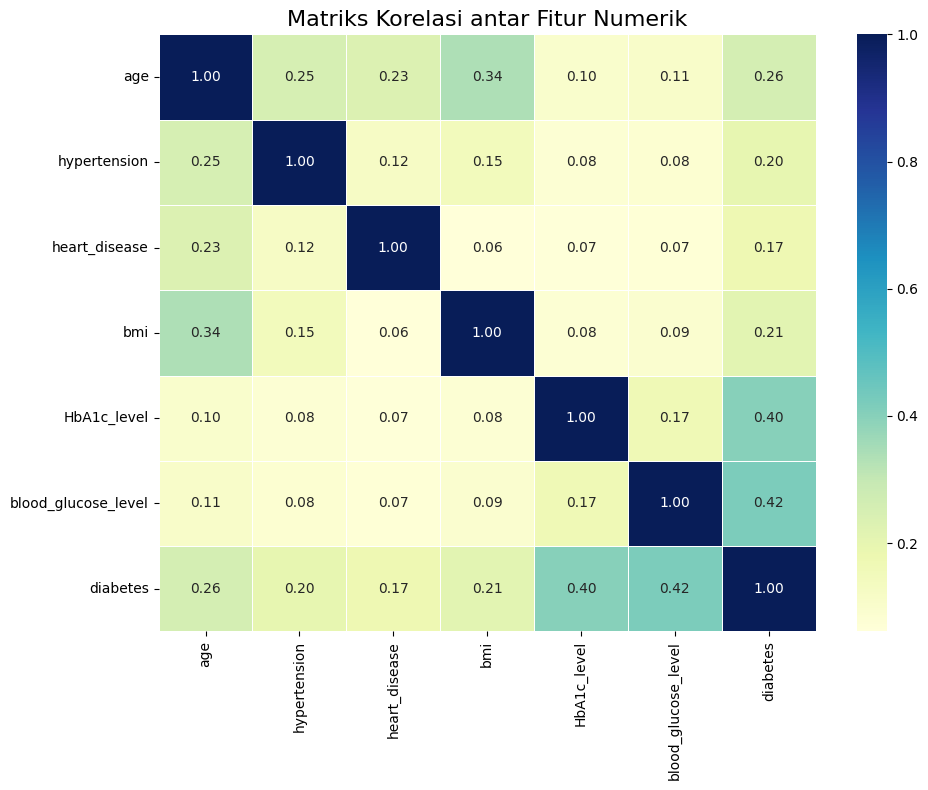

In [5]:
# Menampilkan korelasi antar fitur
# Hitung korelasi antar fitur numerik
correlation_matrix = df.corr(numeric_only=True)

# Plot heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi antar Fitur Numerik", fontsize=16)
plt.tight_layout()
plt.show()

**Insight:**

Berdasarkan heatmap korelasi fitur numerik terhadap target `diabetes`, dapat diamati bahwa fitur `blood_glucose_level` dan `HbA1c_level` memiliki korelasi tertinggi yaitu 0.42 dan 0.40. Selain itu, beberapa fitur lain seperti `age`, `bmi`, `hypertension`, dan `heart_disease` punya kontribusi yang lebih kecil, tapi tetap informatif.

<ipython-input-6-43cca5ddbd56>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diabetes', data=df, palette='viridis')


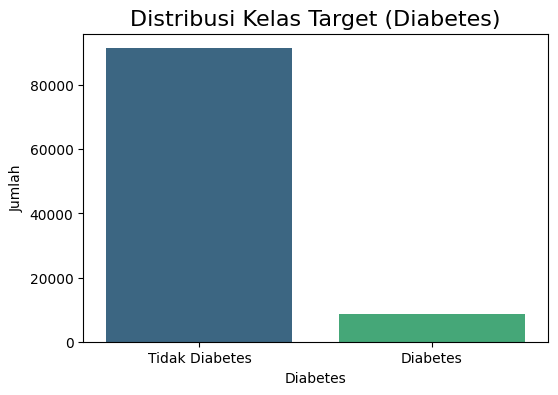


Persentase Distribusi Kelas Target:


,proportion
diabetes,
0,91.5
1,8.5


In [6]:
# prompt: buat distribusi kelas targetnya

# Menampilkan distribusi kelas target
plt.figure(figsize=(6, 4))
sns.countplot(x='diabetes', data=df, palette='viridis')
plt.title('Distribusi Kelas Target (Diabetes)', fontsize=16)
plt.xlabel('Diabetes')
plt.ylabel('Jumlah')
plt.xticks([0, 1], ['Tidak Diabetes', 'Diabetes'])
plt.show()

# Menghitung persentase distribusi kelas
class_distribution = df['diabetes'].value_counts(normalize=True) * 100
print("\nPersentase Distribusi Kelas Target:")
class_distribution

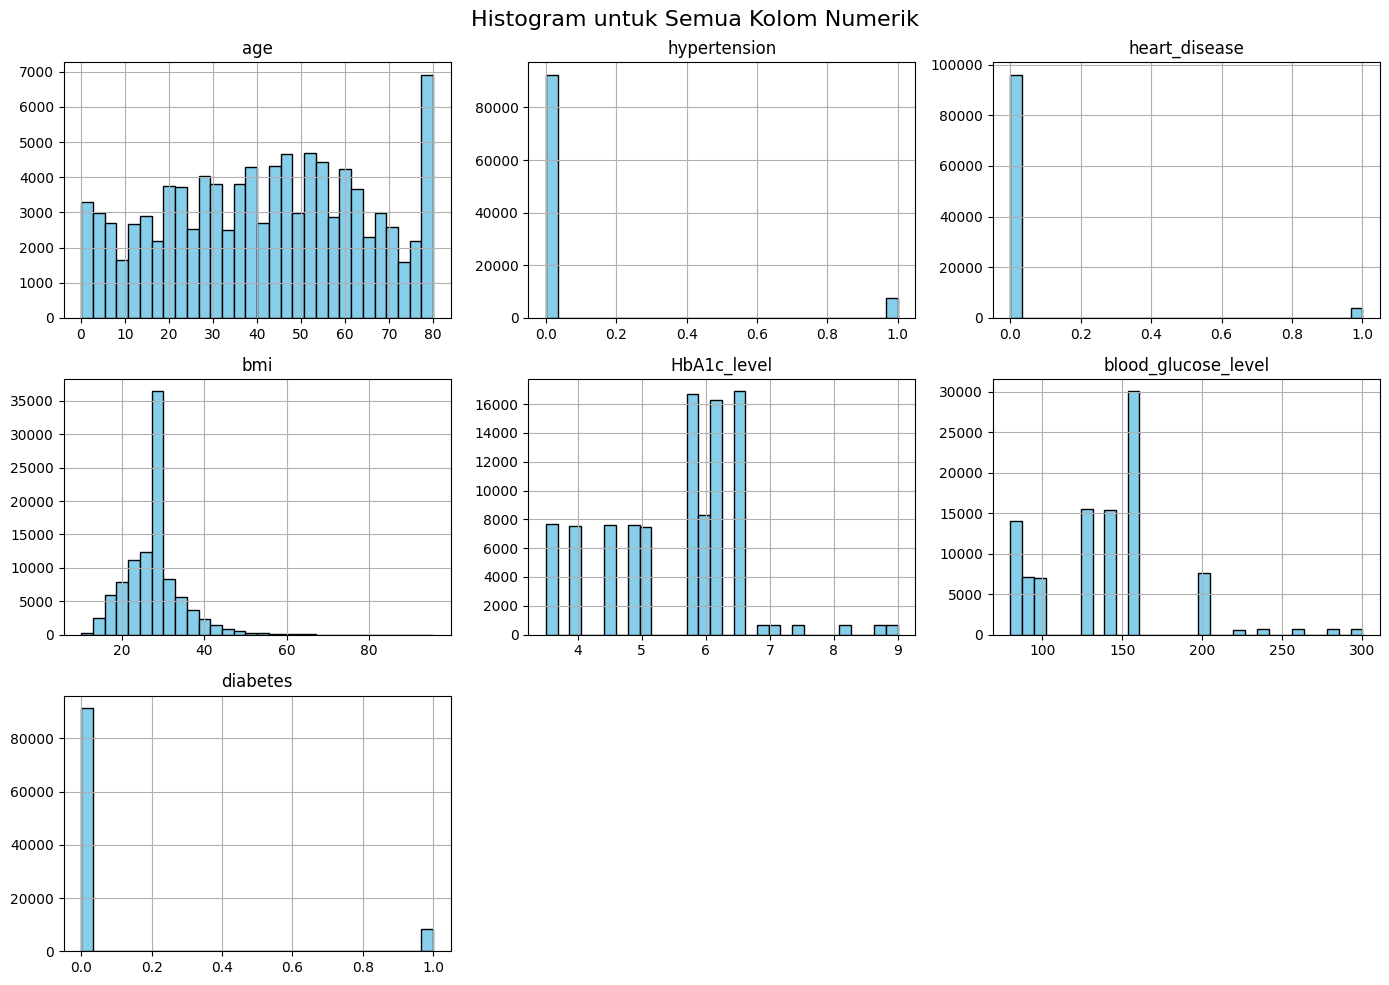

In [7]:
# Menampilkan histogram untuk semua kolom numerik
# Pilih hanya kolom numerik
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Plot histogram untuk semua kolom numerik
numeric_columns.hist(bins=30, figsize=(14, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histogram untuk Semua Kolom Numerik", fontsize=16)
plt.tight_layout()
plt.show()

**Insight:**

* `age`: Distribusi cukup merata dengan puncak di sekitar usia 70-80 tahun. Terdapat outlier ekstrem dengan usia di bawah 1 tahun.
* `hypertension` dan `heart_disease`: Datanya tidak seimbang dengan mayoritas 0 (tidak memiliki riwayat).
* `bmi`: Distribusi positively skewed (condong ke kanan), dengan satu puncak tajam.
* `HbA1c_level`: Distribusi cenderung normal dengan puncak di sekitar 6.0–6.5.
* `blood_glucose_level`: Distribusi tidak normal, dengan lonjakan pada kisaran 140–160.
* `diabetes`: Sangat imbalanced, kelas 0 (non-diabetes) jauh lebih banyak dari kelas 1 (diabetes).



<ipython-input-8-332cf520c841>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', palette='viridis')


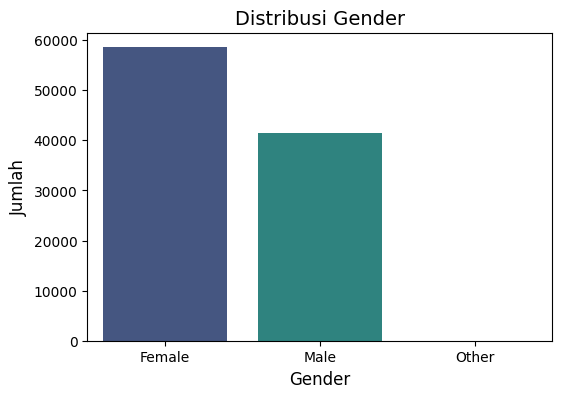

<ipython-input-8-332cf520c841>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='smoking_history', palette='viridis')


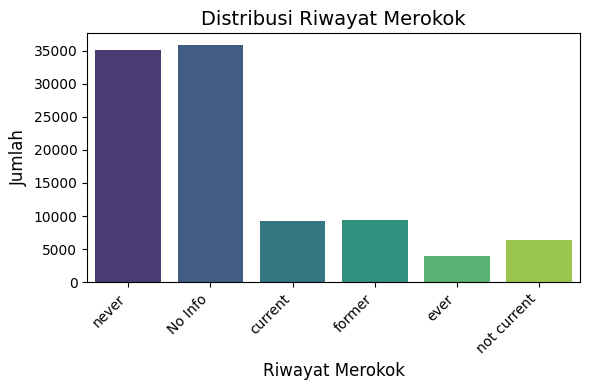

In [8]:
# Visualisasi untuk kolom 'gender'
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='gender', palette='viridis')
plt.title('Distribusi Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.show()

# Visualisasi untuk kolom 'smoking_history'
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='smoking_history', palette='viridis')
plt.title('Distribusi Riwayat Merokok', fontsize=14)
plt.xlabel('Riwayat Merokok', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Insight:**

Berdasarkan visualisasi tersebut, jumlah female lebih banyak dibanding male pada dataset ini. Selain itu, pada distribusi riwayat merokok yaitu No Info dan never memiliki jumlah tertinggi.

<ipython-input-9-6abfa231f5fb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diabetes', y='bmi', data=df, palette='pastel')


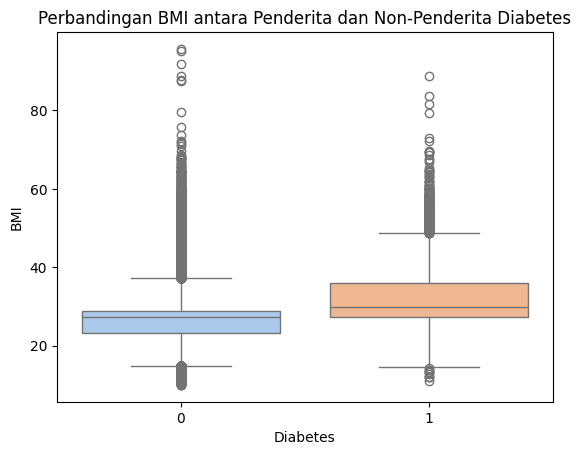

In [9]:
# Visualisasi Perbandingan BMI antara Penderita dan Non-Penderita Diabetes
sns.boxplot(x='diabetes', y='bmi', data=df, palette='pastel')
plt.title('Perbandingan BMI antara Penderita dan Non-Penderita Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('BMI')
plt.show()

**Insight:**

Berdasarkan visualisasi boxplot tersebut, BMI cenderung lebih tinggi pada individu dengan diabetes yang didukung dengan pengetahuan medis bahwa obesitas adalah faktor risiko kuat untuk diabetes tipe 2.

### **Data Cleaning**

In [10]:
# Mengecek missing value dataset menggunakan isnull().sum()
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


**Insight:**

Tidak terdapat missing value pada setiap kolomnya.

In [11]:
# Mengecek duplikasi dataset menggunakan duplicated().sum()
print('Jumlah data duplikat:', df.duplicated().sum())

# Menghapus data duplikat menggunakan drop_duplicates().
df.drop_duplicates(inplace=True)

print('Jumlah data duplikat setelah dihapus:', df.duplicated().sum())

Jumlah data duplikat: 3854
Jumlah data duplikat setelah dihapus: 0


**Insight:**

Terdapat duplikasi data sebanyak 3854.

In [12]:
# Menampilkan jumlah baris dan kolom setelah menghapus data duplikat
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

Jumlah baris: 96146
Jumlah kolom: 9


**Insight:**

Setelah menghapus data duplikat, jumlah baris pada dataset ini menjadi 96146.

In [13]:
# Menampilkan jumlah penderita dan non-penderita diabetes
diabetic_count = df[df['diabetes'] == 1].shape[0]
non_diabetic_count = df[df['diabetes'] == 0].shape[0]

print(f"Jumlah penderita diabetes: {diabetic_count}")
print(f"Jumlah non-penderita diabetes: {non_diabetic_count}")


Jumlah penderita diabetes: 8482
Jumlah non-penderita diabetes: 87664


**Insight:**

Jumlah penderita diabetes setelah dihapus data duplikat menjadi 8482 dan non-penderita diabetes menjadi 87664.

In [14]:
# Mengecek data anomali
# Usia terlalu kecil (misalnya < 1 tahun)
anomali_usia = df[df['age'] < 1]
print(f"Jumlah data dengan usia < 1 tahun: {len(anomali_usia)}")

# BMI yang tidak realistis (misalnya < 10 atau > 60)
anomali_bmi = df[(df['bmi'] < 10) | (df['bmi'] > 60)]
print(f"Jumlah data dengan BMI tidak wajar: {len(anomali_bmi)}")

# HbA1c level yang sangat ekstrem (misalnya < 3 atau > 15)
anomali_hba1c = df[(df['HbA1c_level'] < 3) | (df['HbA1c_level'] > 15)]
print(f"Jumlah data dengan HbA1c_level tidak wajar: {len(anomali_hba1c)}")

# Blood glucose level sangat rendah atau tinggi (misalnya < 50 atau > 300)
anomali_glukosa = df[(df['blood_glucose_level'] < 50) | (df['blood_glucose_level'] > 300)]
print(f"Jumlah data dengan blood_glucose_level tidak wajar: {len(anomali_glukosa)}")

Jumlah data dengan usia < 1 tahun: 910
Jumlah data dengan BMI tidak wajar: 115
Jumlah data dengan HbA1c_level tidak wajar: 0
Jumlah data dengan blood_glucose_level tidak wajar: 0


**Insight:**

Berdasarkan informasi tersebut, jumlah data dengan usia di bawah 1 tahun sebanyak 910 baris dan jumlah data dengan BMI tidak wajar sebanyak 115 baris.

In [15]:
# Menampilkan data usia di bawah 1 tahun
print("Data dengan usia di bawah 1 tahun:")
anomali_usia

Data dengan usia di bawah 1 tahun:


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
155,Female,0.08,0,0,No Info,14.43,6.5,160,0
218,Female,0.56,0,0,No Info,16.85,5.0,140,0
241,Male,0.88,0,0,No Info,17.49,6.0,140,0
268,Female,0.16,0,0,No Info,12.15,6.6,100,0
396,Male,0.16,0,0,No Info,14.35,6.5,126,0
...,...,...,...,...,...,...,...,...,...
99452,Male,0.32,0,0,No Info,15.93,5.7,100,0
99536,Female,0.40,0,0,No Info,16.66,3.5,140,0
99629,Female,0.64,0,0,No Info,17.58,6.1,140,0
99778,Female,0.32,0,0,No Info,12.26,5.8,126,0


In [16]:
# Mengganti usia kurang dari 1 tahun dengan rata-rata usia
rata_rata_usia = df['age'].mean()
df.loc[df['age'] < 1, 'age'] = rata_rata_usia

# Menampilkan jumlah data dengan usia < 1 tahun setelah perubahan
anomali_usia_baru = df[df['age'] < 1]
print(f"Jumlah data dengan usia < 1 tahun setelah diganti dengan rata-rata: {len(anomali_usia_baru)}")

print("\nDataframe setelah penggantian usia:")
df.describe()

Jumlah data dengan usia < 1 tahun setelah diganti dengan rata-rata: 0

Dataframe setelah penggantian usia:


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,42.184907,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.097798,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,1.000000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


<ipython-input-17-2376ebf31059>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diabetes', y='bmi', data=df_before, palette='pastel')
<ipython-input-17-2376ebf31059>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diabetes', y='bmi', data=df, palette='pastel')


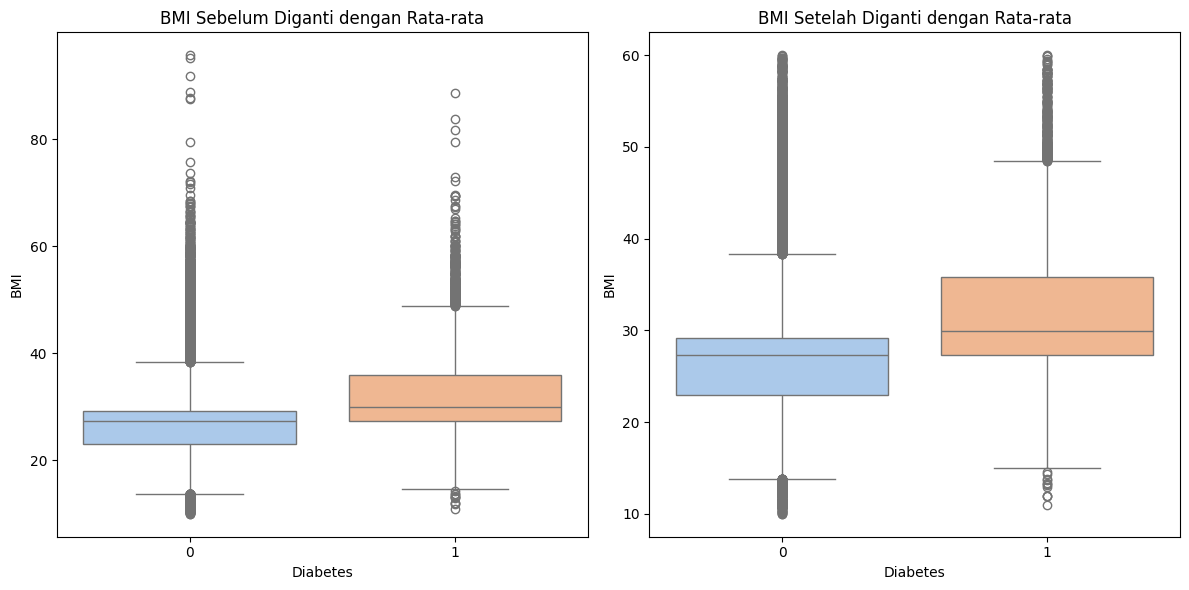

Jumlah data dengan BMI tidak wajar setelah diganti dengan rata-rata: 0


In [17]:
# Buat salinan DataFrame untuk perbandingan
df_before = df.copy()

# Hitung rata-rata BMI
rata_rata_bmi = df['bmi'].mean()

# Ganti nilai BMI anomali dengan rata-rata
df.loc[(df['bmi'] < 10) | (df['bmi'] > 60), 'bmi'] = rata_rata_bmi

# Visualisasi Boxplot BMI Sebelum dan Setelah Perbaikan
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='diabetes', y='bmi', data=df_before, palette='pastel')
plt.title('BMI Sebelum Diganti dengan Rata-rata')
plt.xlabel('Diabetes')
plt.ylabel('BMI')

plt.subplot(1, 2, 2)
sns.boxplot(x='diabetes', y='bmi', data=df, palette='pastel')
plt.title('BMI Setelah Diganti dengan Rata-rata')
plt.xlabel('Diabetes')
plt.ylabel('BMI')

plt.tight_layout()
plt.show()

# Menampilkan jumlah data dengan BMI anomali setelah perubahan
anomali_bmi_baru = df[(df['bmi'] < 10) | (df['bmi'] > 60)]
print(f"Jumlah data dengan BMI tidak wajar setelah diganti dengan rata-rata: {len(anomali_bmi_baru)}")

In [18]:
# Menghapus 'other' pada kolom gender
df = df[df['gender'] != 'Other']
print(df['gender'].value_counts())

gender
Female    56161
Male      39967
Name: count, dtype: int64


**Insight:**

Berdasarkan informasi di atas, other pada kolom gender dihapus karena jumlahnya sangat kecil, hanya sebanyak 18 baris.

### **Encoding**

In [19]:
categorical_cols = ['gender', 'smoking_history']
le = LabelEncoder()
df_encoded = df.copy()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

**Insight:**

Dilakukan encoding untuk kolom kategorikal `gender` dan `smoking_history` menggunakan LabelEncoder dari scikit-learn. Hasilnya disimpan dalam `df_encoded`.

In [20]:
for col in ['gender', 'smoking_history']:
    print(f"\nMapping untuk kolom '{col}':")
    # Menggunakan label_encoders yang sudah dibuat sebelumnya
    le = label_encoders[col]
    # Mendapatkan mapping dari encoder
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    for original_value, encoded_value in mapping.items():
        print(f"'{original_value}' -> {encoded_value}")


Mapping untuk kolom 'gender':
'Female' -> 0
'Male' -> 1

Mapping untuk kolom 'smoking_history':
'No Info' -> 0
'current' -> 1
'ever' -> 2
'former' -> 3
'never' -> 4
'not current' -> 5


**Insight:**

* Pada kolom `gender`, terdapat dua label kategori, yaitu 0 (female) dan 1 (male).
* Pada kolom `smoking_history`, terdapat enam label kategori, yaitu 0 (No Info), 1 (current), 2 (ever), 3 (former), 4 (never), dan 5 (not current).

## **Normalisasi**

In [21]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Select the columns to normalize (assuming all numerical columns except 'diabetes')
numerical_cols = df_encoded.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('diabetes') # Exclude the target variable

# Apply Min-Max scaling to the selected columns
df_scaled = df_encoded.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

**Insight:**

Dilakukan normalisasi Min-Max scaling untuk mengubah setiap nilai fitur numerik ke dalam skala 0 sampai 1.

In [22]:
print("Data setelah normalisasi Min-Max:")
df_scaled.head()

Data setelah normalisasi Min-Max:


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,1.000000,0.0,1.0,0.8,0.303661,0.563636,0.272727,0
1,0.0,0.670886,0.0,0.0,0.0,0.346269,0.563636,0.000000,0
2,1.0,0.341772,0.0,0.0,0.8,0.346269,0.400000,0.354545,0
3,0.0,0.443038,0.0,0.0,0.2,0.268854,0.272727,0.340909,0
4,1.0,0.949367,1.0,1.0,0.2,0.202641,0.236364,0.340909,0


**Insight:**

Semua nilai fitur (kecuali `diabetes`) sekarang berada di rentang [0, 1] yang menunjukkan bahwa normalisasi Min-Max berhasil diterapkan. Normalisasi ini memastikan bahwa tidak ada satu pun fitur numerik yang mendominasi dalam proses pembelajaran model.

### **Membangun Model**

In [23]:
# Pisahkan fitur (X) dan target (y)
X = df_scaled.drop('diabetes', axis=1)
y = df_scaled['diabetes']

# Terapkan SMOTE untuk menyeimbangkan data sebelum split
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y) # Apply SMOTE to the entire dataset

print(f"Jumlah penderita diabetes setelah SMOTE: {sum(y_resampled)}") # Menampilkan jumlah penderita diabetes setelah SMOTE
print(f"Jumlah non-penderita diabetes setelah SMOTE: {len(y_resampled) - sum(y_resampled)}") # Menampilkan jumlah non-penderita diabetes setelah SMOTE

Jumlah penderita diabetes setelah SMOTE: 87646
Jumlah non-penderita diabetes setelah SMOTE: 87646


In [24]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print(f"Jumlah data training: {X_train.shape[0]}")
print(f"Jumlah data test: {X_test.shape[0]}")
print(f"Jumlah seluruh data setelah SMOTE: {X_resampled.shape[0]}")

Jumlah data training: 140233
Jumlah data test: 35059
Jumlah seluruh data setelah SMOTE: 175292


In [25]:
# Buat dan latih model Random Forest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)  # Menggunakan data latih setelah SMOTE

RandomForestClassifier(random_state=42)

In [26]:
# Lakukan prediksi pada data uji
y_pred = model_rf.predict(X_test)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     17465
           1       0.98      0.98      0.98     17594

    accuracy                           0.98     35059
   macro avg       0.98      0.98      0.98     35059
weighted avg       0.98      0.98      0.98     35059

Akurasi: 0.9767249493710602


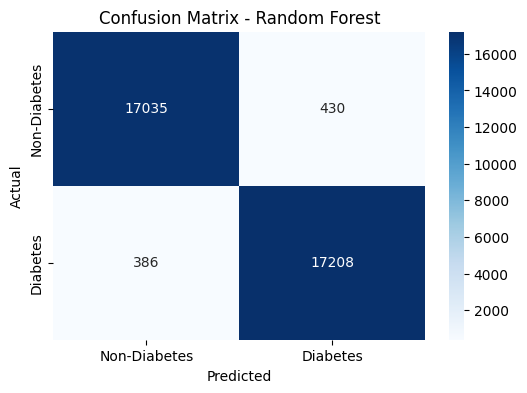

In [27]:
# Evaluasi model
print(classification_report(y_test, y_pred))
print("Akurasi:", accuracy_score(y_test, y_pred))

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasikan dengan heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetes', 'Diabetes'], yticklabels=['Non-Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

Evaluasi Model XGBoost:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17465
           1       0.99      0.96      0.98     17594

    accuracy                           0.98     35059
   macro avg       0.98      0.98      0.98     35059
weighted avg       0.98      0.98      0.98     35059

Akurasi XGBoost: 0.9766393793319832


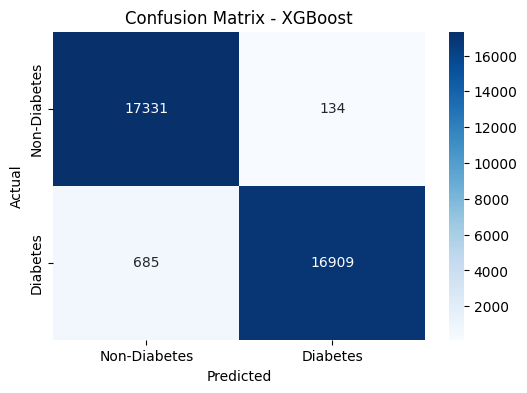

In [28]:

!pip install xgboost
from xgboost import XGBClassifier

# Buat dan latih model XGBoost
model_xgb = XGBClassifier(random_state=42)
model_xgb.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred_xgb = model_xgb.predict(X_test)

# Evaluasi model XGBoost
print("Evaluasi Model XGBoost:")
print(classification_report(y_test, y_pred_xgb))
print("Akurasi XGBoost:", accuracy_score(y_test, y_pred_xgb))

# Buat confusion matrix untuk XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Visualisasikan confusion matrix XGBoost dengan heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetes', 'Diabetes'], yticklabels=['Non-Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.show()


In [30]:
import numpy as np
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model_rf, X_resampled, y_resampled, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Print the average cross-validation score
print("Average cross-validation accuracy:", np.mean(cv_scores))


Cross-validation scores: [0.95099689 0.98419807 0.98314222 0.98157339 0.98248617]
Average cross-validation accuracy: 0.9764793473959891


**Insight:**

Hasil cross-validation Random Forest menunjukkan akurasi tinggi dan konsisten dengan rata-rata sekitar 97.65%. Skor di tiap fold cukup stabil, menandakan model tahan terhadap variasi data dan tidak mudah overfitting. Ini mengindikasikan Random Forest mampu memberikan prediksi yang andal dan generalisasi baik untuk risiko diabetes.


In [31]:
# Perform 5-fold cross-validation for XGBoost
cv_scores_xgb = cross_val_score(model_xgb, X_resampled, y_resampled, cv=5, scoring='accuracy')

# Print the cross-validation scores for XGBoost
print("\nCross-validation scores (XGBoost):", cv_scores_xgb)

# Print the average cross-validation score for XGBoost
print("Average cross-validation accuracy (XGBoost):", np.mean(cv_scores_xgb))


Cross-validation scores (XGBoost): [0.91867994 0.98782053 0.98793428 0.98699298 0.98599464]
Average cross-validation accuracy (XGBoost): 0.973484474297047


**Insight:**

Hasil cross-validation XGBoost menunjukkan akurasi tinggi dan konsisten dengan rata-rata 97,65%. Variasi skor yang kecil menandakan model stabil dan tidak overfitting, sehingga mampu melakukan generalisasi dengan baik.


### **Inference**

In [32]:
# Input data for inference
input_data = {
    'gender': 'Female',
    'age': 44,
    'hypertension': 0,
    'heart_disease': 0,
    'smoking_history': 'never',
    'bmi': 19.31,
    'HbA1c_level': 6.5,
    'blood_glucose_level': 200
}

input_df = pd.DataFrame([input_data])
input_df = input_df[X.columns]
le_gender = LabelEncoder()
le_gender.fit(df['gender'].unique()) # Fit on original unique values
input_df['gender'] = le_gender.transform(input_df['gender'])

le_smoking = LabelEncoder()
le_smoking.fit(df['smoking_history'].unique()) # Fit on original unique values
input_df['smoking_history'] = le_smoking.transform(input_df['smoking_history'])
input_df[numerical_cols] = scaler.transform(input_df[numerical_cols])

# Make predictions
prediction = model_rf.predict(input_df)

# Print the prediction (0 for non-diabetic, 1 for diabetic)
print("Prediction:", prediction)

if prediction[0] == 1:
    print("Diprediksi Diabetes")
else:
    print("Diprediksi Non-Diabetes")

Prediction: [1]
Diprediksi Diabetes


In [33]:
# Menyimpan model menggunakan joblib
joblib.dump(le_gender, 'le_gender.joblib')
joblib.dump(le_smoking, 'le_smoking.joblib')
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(model_rf, "model_diabetes.joblib")

['model_diabetes.joblib']